# Read the data

In [1]:
import pandas as pd

product_reviews = pd.read_csv('product_review.csv')
product_reviews

,Reviews
0,Really impressed with the fastest delivery of ...
1,This is the second time I am writing this revi...
2,1. Quite good look2. Better noise cancellation...
3,its a good set of ear buds but1. the quality o...
4,I have been researching about getting a nice T...
...,...
3645,The product of Boat is too good but Total disa...
3646,I find too much of Bass kills the sound of oth...
3647,Sound and bass quality is goodBut not proper w...
3648,Awesome product delivered by Amazon and Boat. ...


In [2]:
product_reviews.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3645    False
3646    False
3647    False
3648    False
3649    False
Length: 3650, dtype: bool

In [3]:
product_reviews.to_csv('product_review1.csv', index = False)

In [4]:
product_reviews.isnull().sum()

Reviews    0
dtype: int64

In [5]:
product_reviews.dtypes

Reviews    object
dtype: object

In [6]:
product_reviews.head(5)

,Reviews
0,Really impressed with the fastest delivery of ...
1,This is the second time I am writing this revi...
2,1. Quite good look2. Better noise cancellation...
3,its a good set of ear buds but1. the quality o...
4,I have been researching about getting a nice T...


In [7]:
product_reviews.tail(10)

,Reviews
3640,The casing is little boxy but still okay to ca...
3641,"Worst product of my life, when i use boat aird..."
3642,Im really disappointed as the sound quality is...
3643,If you want to use it for music or video it is...
3644,"It's bad call function stops working, firstly ..."
3645,The product of Boat is too good but Total disa...
3646,I find too much of Bass kills the sound of oth...
3647,Sound and bass quality is goodBut not proper w...
3648,Awesome product delivered by Amazon and Boat. ...
3649,"yes, but some objects are nice to use and some..."


# Text Wrangling and pre-processing

In [8]:
!pip install spacy

In [10]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 407.3 kB/s eta 0:00:00
     ------------------------------------ 262.0/262.0 kB 555.8 kB/s eta 0:00:00
     ------------------------------------ 307.0/307.0 kB 499.5 kB/s eta 0:00:00


In [11]:
import spacy 
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata
import requests
from bs4 import BeautifulSoup
import string

In [17]:
!python -m spacy download en_core_web_sm

     -------------------------------------- 12.8/12.8 MB 395.6 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
nlp = spacy.load("en_core_web_sm")

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\WAY
[nltk_data]     TOMORROW\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

# Checking for special character

In [21]:
n= product_reviews['Reviews']
c=0
s='[@_!#$%^&*()<>?/\|}{~:]' # special character set
for i in range(len(n)):
    # checking if any special character is present in given string or not
    if n[i] in s:
      c+=1   # if special character found then add 1 to the c
 
 # if c value is greater than 0 then print no
# means special character is found in string     
if c:
    print("string didn't have special character")
else:
    print("string have special character")
    
n

string have special character


0       Really impressed with the fastest delivery of ...
1       This is the second time I am writing this revi...
2       1. Quite good look2. Better noise cancellation...
3       its a good set of ear buds but1. the quality o...
4       I have been researching about getting a nice T...
                              ...                        
3645    The product of Boat is too good but Total disa...
3646    I find too much of Bass kills the sound of oth...
3647    Sound and bass quality is goodBut not proper w...
3648    Awesome product delivered by Amazon and Boat. ...
3649    yes, but some objects are nice to use and some...
Name: Reviews, Length: 3650, dtype: object

# Remove special characters set

In [22]:
def remove_special_characters_set(text, remove_sets=False):
    pattern = r'[@_!#$%^&*()<>?/\|}{~:]' if not remove_sets else r'[@_!#$%^&*()<>?/\|}{~:]'
    text = re.sub(pattern, '' , text)
    return text

remove_special_characters_set('AppData~\Local\:Temp/:ipykernel(_)35016/623493850')

'AppData\\Local\\Tempipykernel35016623493850'

# Remove Emoji

In [23]:
def remove_emoji(product_reviews):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF" 
                               u"\U0001F680-\U0001F6FF" 
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF" 
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Expanding Contractions

In [24]:
product_reviews['Reviews'].iloc[2]

"1. Quite good look2. Better noise cancellation, good base.3. Quite lighter, fixes in the ear well4. Inspite having bluetooth 5.0, Doesn't connect to two Device at same time. I had bought it to use it with my honor smart watch along with my mobile but couldn't do so.5. No charging cable, No ear buds of different size, Nothing extraa given.Can't comment on battery backup. Seemed good."

In [28]:
!pip install contractions

  Using cached contractions-0.1.72-py2.py3-none-any.whl (8.3 kB)
  Using cached textsearch-0.0.21-py2.py3-none-any.whl (7.5 kB)
  Using cached anyascii-0.3.1-py3-none-any.whl (287 kB)


In [29]:
import contractions
text = product_reviews['Reviews'].iloc[2]
expanded_words = [] 
for word in text.split():
  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word))  

expanded_text = ' '.join(expanded_words)
print('Original text: ' + text)
print('Expanded_text: ' + expanded_text)



Original text: 1. Quite good look2. Better noise cancellation, good base.3. Quite lighter, fixes in the ear well4. Inspite having bluetooth 5.0, Doesn't connect to two Device at same time. I had bought it to use it with my honor smart watch along with my mobile but couldn't do so.5. No charging cable, No ear buds of different size, Nothing extraa given.Can't comment on battery backup. Seemed good.
Expanded_text: 1. Quite good look2. Better noise cancellation, good base.3. Quite lighter, fixes in the ear well4. Inspite having bluetooth 5.0, Does not connect to two Device at same time. I had bought it to use it with my honor smart watch along with my mobile but could not do so.5. No charging cable, No ear buds of different size, Nothing extraa given.Cannot comment on battery backup. Seemed good.


  # Remove HTML tags

In [30]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>product_reviews</h2></html>')


'product_reviews'

# Remove accented characters
     

In [31]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'igonre')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

# Remove special characters

In [32]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '' , text)
    return text
    
remove_special_characters("Well this was fun! what do you think? 123#@!", remove_digits=True)

'Well this was fun what do you think '

# Text lemmatization

In [33]:
#It  uses the context in which the word is being used
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, our crashes daily")

'my system keep crash ! his crash yesterday , our crash daily'

# Text stemming

In [34]:
#It uses the stem of the word
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'my system keep crash hi crash yesterday, our crash daili'

# Remove stopwords

In [35]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, Computer is not")

', , stopwords , Computer not'

# Building a text normalizer

In [36]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True, remove_sets=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # remove special characters sets
        if remove_special_characters_set:
            doc = remove_special_characters_set(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

# Pre-process and normalize reviews

In [37]:
product_reviews['full_text'] = product_reviews['Reviews']

In [38]:
product_reviews['clean_text'] = normalize_corpus(product_reviews['full_text'])
norm_corpus = list(product_reviews['clean_text'])
product_reviews.iloc[1][['full_text', 'clean_text']].to_dict()

C:\Users\WAY TOMORROW\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


{'full_text': 'This is the second time I am writing this review. Not sure why my earlier detailed review which was more like a ownership review was deleted by Amazon. Hope this review is published and not eventually deleted however this review would not be as detailed as the previous one. Purchased this product in Aug 2020 and since then had 3 replacements from Boat within a year. Each unit would last 3 to 4 months max depending upon the usage and always one or the other earpiece would die out. The left earpiece of the 3rd replacement died out 2 days back. Please note I have mostly used them during my morning jogging/running. Over all the sound quality is good and enjoy them as long as they last but the overall durability of the device is very very poor. Attaching the 3 earpiece chargers as a proof.',
 'clean_text': 'second time I write review not sure early detailed review like ownership review delete amazon hope review publish not eventually delete however review would not detailed p

In [39]:
n= product_reviews['clean_text']
c=0
s='[@_!#$%^&*()<>?/\|}{~:]' # special character set
for i in range(len(n)):
    # checking if any special character is present in given string or not
    if n[i] in s:
        c+=1   # if special character found then add 1 to the c
 
 #if c value is greater than 0 then print no
# means special character is found in string     
if c:
    print("string didn't have special character")
else:
    print("string have special character")
    
n

string didn't have special character


0       really impressed fast delivery amazon I order ...
1       second time I write review not sure early deta...
2       quite good look well noise cancellation good b...
3       good set ear bud quality sound get bad connect...
4       I research get nice tws bud everyday use prior...
                              ...                        
3645    product boat good total disappointed sale serv...
3646    I find much bass kill sound instrument people ...
3647    sound bass quality goodbut not proper work air...
3648    awesome product deliver amazon boat nice sound...
3649    yes object nice use bad exchange u get well pr...
Name: clean_text, Length: 3650, dtype: object

# save the reviews

In [40]:
product_reviews.to_csv('product_review1.csv', index=False, encoding='utf-8')

# Tagging Parts of Speech

In [41]:
product_reviews = pd.read_csv('product_review1.csv')

In [42]:
corpus = normalize_corpus(product_reviews['full_text'], text_lower_case=False,
                         text_lemmatization=False, special_char_removal=False)

sentence = str(product_reviews.iloc[3545].Reviews)
sentence_nlp = nlp(sentence)

C:\Users\WAY TOMORROW\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [43]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,Sound,JJ,ADJ
1,quality,NN,NOUN
2,is,VBZ,AUX
3,not,RB,PART
4,good,JJ,ADJ
5,it,PRP,PRON
6,do,VBP,AUX
7,n't,RB,PART
8,feel,VB,VERB
9,like,IN,ADP


In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\WAY
[nltk_data]     TOMORROW\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\WAY TOMORROW\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [46]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\WAY TOMORROW\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [47]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())

In [48]:
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,Sound,JJ
1,quality,NN
2,is,VBZ
3,not,RB
4,good,JJ
5,it,PRP
6,don't,VBZ
7,feel,VB
8,like,IN
9,music,NN


# Named Entity Recognition

In [49]:
sentence = str(product_reviews.iloc[1].full_text)

In [50]:
sentence

'This is the second time I am writing this review. Not sure why my earlier detailed review which was more like a ownership review was deleted by Amazon. Hope this review is published and not eventually deleted however this review would not be as detailed as the previous one. Purchased this product in Aug 2020 and since then had 3 replacements from Boat within a year. Each unit would last 3 to 4 months max depending upon the usage and always one or the other earpiece would die out. The left earpiece of the 3rd replacement died out 2 days back. Please note I have mostly used them during my morning jogging/running. Over all the sound quality is good and enjoy them as long as they last but the overall durability of the device is very very poor. Attaching the 3 earpiece chargers as a proof.'

In [51]:
sentence_nlp = nlp(sentence)

In [52]:
sentence_nlp

This is the second time I am writing this review. Not sure why my earlier detailed review which was more like a ownership review was deleted by Amazon. Hope this review is published and not eventually deleted however this review would not be as detailed as the previous one. Purchased this product in Aug 2020 and since then had 3 replacements from Boat within a year. Each unit would last 3 to 4 months max depending upon the usage and always one or the other earpiece would die out. The left earpiece of the 3rd replacement died out 2 days back. Please note I have mostly used them during my morning jogging/running. Over all the sound quality is good and enjoy them as long as they last but the overall durability of the device is very very poor. Attaching the 3 earpiece chargers as a proof.

In [53]:
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(second, 'ORDINAL'), (Amazon, 'ORG'), (Aug, 'DATE'), (2020, 'DATE'), (Boat, 'GPE'), (a, 'DATE'), (year, 'DATE'), (last, 'DATE'), (3, 'DATE'), (to, 'DATE'), (4, 'DATE'), (months, 'DATE'), (max, 'PERSON'), (one, 'CARDINAL'), (3rd, 'ORDINAL'), (2, 'DATE'), (days, 'DATE'), (3, 'CARDINAL')]


In [54]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities,
                            columns=['Entity Name', 'Entity Type'])        
        
            

In [55]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                            .size()
                            .sort_values(ascending=False)
                            .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,one,Amazon,441,first,Bass,TWS,Boat,1,One,2,3,second,two,5,First
Entity Type,CARDINAL,ORG,CARDINAL,ORDINAL,PERSON,ORG,PERSON,CARDINAL,CARDINAL,CARDINAL,CARDINAL,ORDINAL,CARDINAL,CARDINAL,ORDINAL
Frequency,618,210,207,197,134,111,110,108,107,103,85,79,77,76,60


In [56]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,CARDINAL,DATE,ORG,PERSON,TIME,ORDINAL,GPE,NORP,QUANTITY,PRODUCT,PERCENT,LOC,WORK_OF_ART,MONEY,FAC
Frequency,2692,1758,1202,799,553,442,303,108,98,91,37,31,27,19,13


# Emotion and Sentiment Analysis

In [58]:
!pip install afinn

  Using cached afinn-0.1.tar.gz (52 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53431 sha256=7c0b574012b4c5d24702fe437481b0cf3db0d8c430af52b08851d8f9756391bb
  Stored in directory: c:\users\way tomorrow\appdata\local\pip\cache\wheels\b0\05\90\43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [59]:
from afinn import Afinn

In [60]:
af = Afinn()

In [61]:
sentiment_scores = [af.score(review_body) for review_body in corpus]

In [62]:
sentiment_category = ['positive' if score > 0
                          else 'negative' if score < 0
                             else 'neutral'
                                 for score in sentiment_scores]

In [63]:
df = pd.DataFrame([list(product_reviews['Reviews']), sentiment_scores, sentiment_category]).T

In [64]:
df.columns = ['Reviews','sentiment_score', 'sentiment_category']

In [65]:
df['sentiment_score'] = df.sentiment_score.astype('float')

In [66]:
product_reviews.shape

(3650, 3)

In [67]:
df.groupby(by=['Reviews']).describe().tail(10)

sentiment_score            \
                                                             count  mean std   
Reviews                                                                        
within a week the right earbud stop charging. B...             1.0  -1.0 NaN   
yeah as i mentioned the bass of the airdopes ar...             1.0  10.0 NaN   
yes, but some objects are nice to use and some ...             1.0   9.0 NaN   
बैटरी बैकअप भी उतना ज्यादा नहीं है और सुस्ती सी...             1.0   0.0 NaN   
मेरे साथ Fraude हुआ हैमैंने इस product को खरीदा...             1.0   1.0 NaN   
• Sound quality perfect• mic very poor quality ...             1.0   3.0 NaN   
✓Sound quality perfect 9/10( best sound experie...             1.0  14.0 NaN   
👉🏻 The best Truly wireless earbuds you can get ...             1.0  16.0 NaN   
🟢 Very easy to use. One of the best things is t...             1.0   2.0 NaN   
🥳Price is reasonable but still it doesn't have ...             1.0  10.0 NaN   

                                                                            \
                                                     min   25%   50%   75%   
Reviews                                                                      
within a week the right earbud stop charging. B...  -1.0  -1.0  -1.0  -1.0   
yeah as i mentioned the bass of the airdopes ar...  10.0  10.0  10.0  10.0   
yes, but some objects are nice to use and some ...   9.0   9.0   9.0   9.0   
बैटरी बैकअप भी उतना ज्यादा नहीं है और सुस्ती सी...   0.0   0.0   0.0   0.0   
मेरे साथ Fraude हुआ हैमैंने इस product को खरीदा...   1.0   1.0   1.0   1.0   
• Sound quality perfect• mic very poor quality ...   3.0   3.0   3.0   3.0   
✓Sound quality perfect 9/10( best sound experie...  14.0  14.0  14.0  14.0   
👉🏻 The best Truly wireless earbuds you can get ...  16.0  16.0  16.0  16.0   
🟢 Very easy to use. One of the best things is t...   2.0   2.0   2.0   2.0   
🥳Price is reasonable but still it doesn't have ...  10.0  10.0  10.0  10.0   

                                                          
                                                     max  
Reviews                                                   
within a week the right earbud stop charging. B...  -1.0  
yeah as i mentioned the bass of the airdopes ar...  10.0  
yes, but some objects are nice to use and some ...   9.0  
बैटरी बैकअप भी उतना ज्यादा नहीं है और सुस्ती सी...   0.0  
मेरे साथ Fraude हुआ हैमैंने इस product को खरीदा...   1.0  
• Sound quality perfect• mic very poor quality ...   3.0  
✓Sound quality perfect 9/10( best sound experie...  14.0  
👉🏻 The best Truly wireless earbuds you can get ...  16.0  
🟢 Very easy to use. One of the best things is t...   2.0  
🥳Price is reasonable but still it doesn't have ...  10.0

In [68]:
df.sort_values(by='sentiment_score').tail(10)

,Reviews,sentiment_score,sentiment_category
230,UPDATE: Sept 21It's been more than a year usin...,39.0,positive
212,"Worth waiting as I ordered it on 8 August, Fre...",40.0,positive
167,"If you are a bass lover then go for it, bass ...",41.0,positive
141,"So, I had tempered my expectations from this p...",42.0,positive
334,This airdopes is just amazing for its price. S...,42.0,positive
125,I knew I wanted Boats this time but which one?...,42.0,positive
541,"These earbuds are MARVELOUS, Like before these...",43.0,positive
565,Long story short - I'm lovin it.Got myself a B...,45.0,positive
46,Just bought this boat 441 two days back. Here ...,49.0,positive
16,"If you are a fan of bass like I am, hell, you ...",82.0,positive


In [69]:
df['sentiment_category'].value_counts()

positive    2646
negative     791
neutral      213
Name: sentiment_category, dtype: int64

In [70]:
df[(df.sentiment_category=='positive') & (df.sentiment_score > 0)]

,Reviews,sentiment_score,sentiment_category
0,Really impressed with the fastest delivery of ...,16.0,positive
1,This is the second time I am writing this revi...,4.0,positive
2,1. Quite good look2. Better noise cancellation...,12.0,positive
3,its a good set of ear buds but1. the quality o...,5.0,positive
4,I have been researching about getting a nice T...,35.0,positive
...,...,...,...
3639,After searching for too many TWS finally I bou...,4.0,positive
3640,The casing is little boxy but still okay to ca...,8.0,positive
3647,Sound and bass quality is goodBut not proper w...,2.0,positive
3648,Awesome product delivered by Amazon and Boat. ...,9.0,positive


In [71]:
df[(df.sentiment_category=='negative') & (df.sentiment_score < 0)]

,Reviews,sentiment_score,sentiment_category
5,I received the product with some defect. The l...,-8.0,negative
6,"Boat AirDopes, have by far been the most champ...",-8.0,negative
7,Worst product plz don't buy it you will regret...,-8.0,negative
11,Honest review after replacing the first assumi...,-7.0,negative
12,defective left ear piece. Cracking sound on st...,-12.0,negative
...,...,...,...
3642,Im really disappointed as the sound quality is...,-8.0,negative
3643,If you want to use it for music or video it is...,-2.0,negative
3644,"It's bad call function stops working, firstly ...",-7.0,negative
3645,The product of Boat is too good but Total disa...,-3.0,negative


In [72]:
df[(df.sentiment_category=='neutral') & (df.sentiment_score == 0)]

,Reviews,sentiment_score,sentiment_category
25,Boat airdopes 441 pro model is having an issue...,0.0,neutral
26,Please avoid buying this as there is a constan...,0.0,neutral
27,There is a static noise in left ear bud.,0.0,neutral
37,Music quality is average but the calling quali...,0.0,neutral
39,The good:+ Connection is alright+ Build qualit...,0.0,neutral
...,...,...,...
3588,Microphone quality is very poor cannot be used...,0.0,neutral
3593,"Made in China product, quality is not that goo...",0.0,neutral
3620,getting issue with media sound..not getting so...,0.0,neutral
3634,Everything was good untill it was workingNow t...,0.0,neutral


# Visualizing Reviews Sentiment

In [74]:
!pip install seaborn

     ------------------------------------ 292.8/292.8 kB 142.4 kB/s eta 0:00:00
  Using cached scipy-1.8.1-cp310-cp310-win_amd64.whl (36.9 MB)


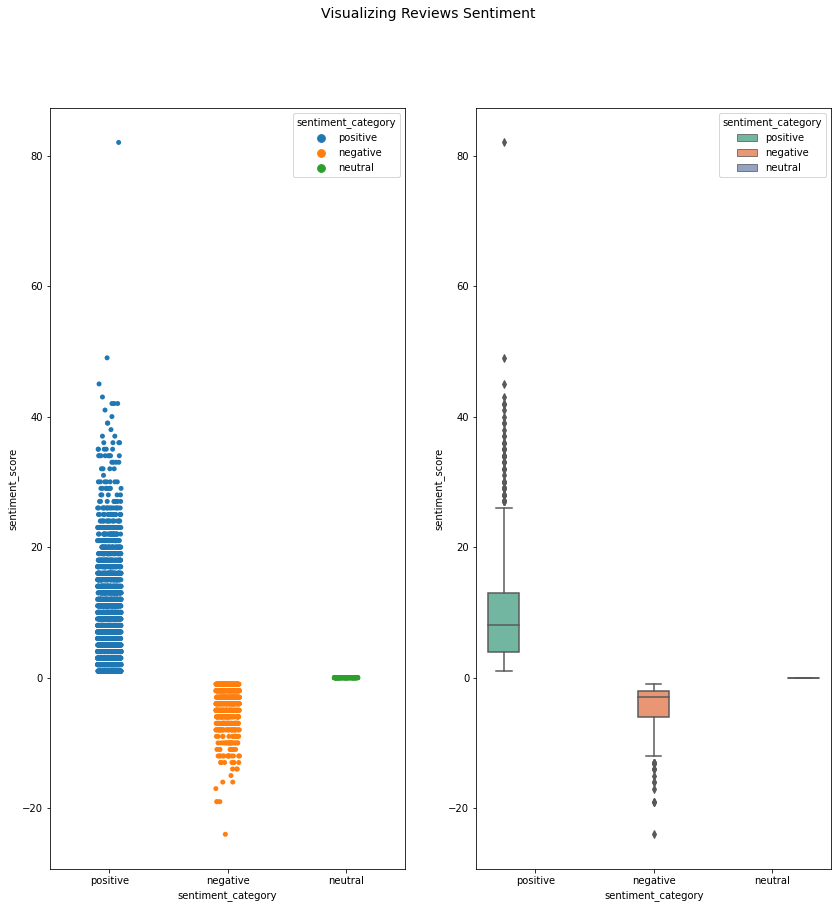

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 14))
sp = sns.stripplot(x='sentiment_category', y="sentiment_score", hue='sentiment_category', data=df, ax=ax1)
bp = sns.boxplot(x='sentiment_category', y="sentiment_score", hue='sentiment_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing Reviews Sentiment', fontsize=14)

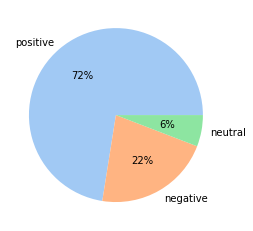

In [76]:
#define data
data = [2646, 791, 213]
labels = ['positive', 'negative', 'neutral']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Word Cloud

In [77]:
from wordcloud import WordCloud

In [81]:
df.head()

,Reviews,sentiment_score,sentiment_category
0,Really impressed with the fastest delivery of ...,16.0,positive
1,This is the second time I am writing this revi...,4.0,positive
2,1. Quite good look2. Better noise cancellation...,12.0,positive
3,its a good set of ear buds but1. the quality o...,5.0,positive
4,I have been researching about getting a nice T...,35.0,positive


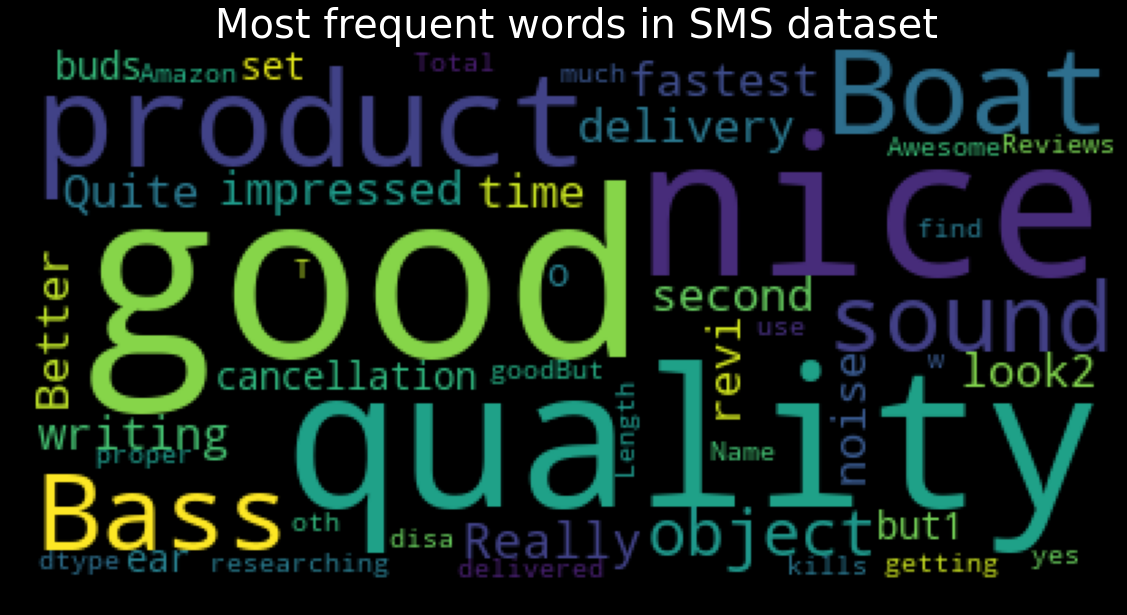

In [82]:
wc = WordCloud()
wc.generate(str(df['Reviews']))
plt.figure(figsize=(20,10), facecolor='k')
plt.title("Most frequent words in SMS dataset", fontsize=40,color='white')
plt.imshow(wc)
plt.show()

In [84]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


# Sentiment calculation

In [85]:
from textblob import TextBlob

In [92]:
text = "• Sound quality perfect• mic very poor quality ,when sending a voice msg its make more noise than our voice also problem while calling"

In [93]:
result = TextBlob(text)
result.sentiment.polarity

0.12666666666666668

# Classification